# Cyber Security Intelligence & Analytics (CSIA)

## Project Description :      [@GitHub README](https://github.com/RichardAfolabi/Data_Analysis_with_Python/blob/master/virus_malware_analytics/README.md)

<hr>
>__Core: Malicious Software (Malware) Profile Analysis__
<hr>

1. **Original Dataset** - Thousands of data capture daily for 36 months
2. **Data Source** - Passive Domain Name System (DNS) malicious malware attack
* **Data Structure** -  4-column entries **`Date`**, **`MD5Hash`** **`Domains`**, **`IP Address`**.
* **Capture Period** - January 01, 2011 ~ December 31, 2013 *36 months*
* **.CSV Data Source** - [GT Malware Passive DNS Data 2011 - 2013](https://www.predict.org/Default.aspx?tabid=104&dsn=GT%20Malware%20Passive%20DNS&cls=2)
* **Data Size** Approx. 44,000,000 Rows X 4 Columns resulting in 3.5GB!

<br/>

In [20]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

pd.set_option('precision', 2)
pd.set_option('notebook_repr_html', True)
# pd.set_option('display.mpl_style', 'default')

import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

import matplotlib.pyplot as plt
from IPython.display import Image, HTML

import plotly as py
import cufflinks as cf
import plotly.graph_objs as go

cf.set_config_file(theme='ggplot', sharing='public', offline=False, world_readable=True)

print('Done!')

Done!


In [3]:
col_names = ['Date', 'MD5Hash', 'Domains', 'IP_Address']
p_url = "./csv_dataset/gt_mpdns_2011-01.csv"
demo_data = pd.read_csv(p_url, index_col=0, names=col_names).head(5)
print("\nWe can't do much with this data without augmentation.\n")
demo_data


We can't do much with this data without augmentation.



,MD5Hash,Domains,IP_Address
Date,,,
2011-01-01,0003b97144cf06801627fdd07a917f51,mozilla.com,63.245.209.106
2011-01-01,0003b97144cf06801627fdd07a917f51,rapidshare.com,195.122.131.12
2011-01-01,0003b97144cf06801627fdd07a917f51,tagshare.in,69.10.39.21
2011-01-01,00134ecf2477c1f477a8767c87572107,mozilla.com,63.245.209.106
2011-01-01,00134ecf2477c1f477a8767c87572107,rapidshare.com,195.122.131.5


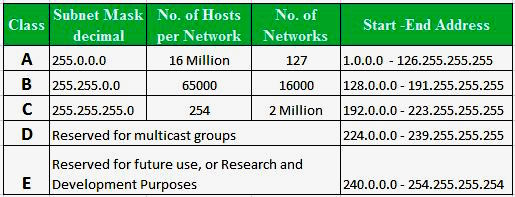

In [470]:
Image("ip_class.jpeg")

## Data Preparation, Augmentation and Scraping (DPAS) using `geolocation` API   (1)

#### Data Preparation

* Filter rows with vital missing data.
* Wrote script to classify each `IP` to **`IP Classes`** column. 

#### Data Augmentation

* Introduced additional columns to understand the `time series`.
* Use TWO `Geo-Data API` services to extract location data about each IP.

#### Data Scraping
* Many of the data contains abbrev./codes(`Country`, `City`, `Continent`)
* Scraping to fetch comprehensive web data for decoding (`Long`/`Lat` => `Country`)

#### Data Merging & Cleaning
* Merging the augmented data, web data and API fetched data.
* Filter the clean data, ready for EDA and modeling.



1. Data preparation and description of features: [Notebook 1](http://nbviewer.ipython.org/github/RichardAfolabi/Data_Analysis_with_Python/blob/master/virus_malware_analytics/Malware%20ToDo.ipynb)

2. API Data scraping using GeoIPS API Service [Notebook 2](http://nbviewer.ipython.org/github/RichardAfolabi/Data_Analysis_with_Python/blob/master/virus_malware_analytics/Extract%20Data%20from%20GEOIPS.COM%20using%20API%20Service.ipynb)

3. API Data scraping using `freegeoip.net` and data cleaning [Notebook 3](http://nbviewer.jupyter.org/github/RichardAfolabi/Data_Analysis_with_Python/blob/master/virus_malware_analytics/Data%20Preparation%20%20-%20Extract%20IP%20GeoLocation%20Data%20using%20Domain%20Names%20on%20API%20Services%20.ipynb)

<br/>

**API Services:** [FreeGeoip.net](www.freegeoip.net) and [GeoIPS.com](www.geoips.com)


** Final dataset - `augmented_ip_geodata.csv` **

## Data Preparation, Augmentation and Scraping (DPAS) using `geolocation` API   (2)

In [4]:
# Dataset with unique IPs
data_url = "https://s3-us-west-2.amazonaws.com/cyber-security-dataset/clean_malware_dataset.csv.gz"
clean_malware_dataset = pd.read_csv(data_url, index_col=0, compression='gzip')

# Compute elapsed days and weeks since infection logging started.
parsed_date = pd.to_datetime(clean_malware_dataset.Date.values)
clean_malware_dataset['Days_elapsed'] = (parsed_date - pd.datetime(2011,1,1)).days
clean_malware_dataset['Weeks_elapsed'] = [divmod(dayx, 7)[0] for dayx in clean_malware_dataset.Days_elapsed]

# We assume an average of 30 Days / months for simplicity.
clean_malware_dataset['Months_elapsed'] = [divmod(dayx, 30)[0] for dayx in clean_malware_dataset.Days_elapsed]
clean_malware_dataset.drop(['Year', 'month'], axis=1, inplace=True)
clean_malware_dataset.tail(3)

,Date,MD5Hash,Domains,IP_Address,Days_elapsed,Weeks_elapsed,Months_elapsed
44502004,2013-12-31,ffeb275390d1588378373efc28e628cf,partner.googleadservices.com,74.125.225.121,1095,156,36
44502005,2013-12-31,ffeb275390d1588378373efc28e628cf,pubads.g.doubleclick.net,74.125.225.122,1095,156,36
44502006,2013-12-31,ffeb275390d1588378373efc28e628cf,www.googletagservices.com,74.125.225.122,1095,156,36


In [32]:
# Augmented dataset obtained from using geolocation API with IP address as input parameter
file_name = "https://s3-us-west-2.amazonaws.com/cyber-security-dataset/augmented_ip_geodata.csv.gz"
augmented_ip_geodata = pd.read_csv(file_name, low_memory=False, index_col=0, compression='gzip')
augmented_ip_geodata.drop(['CONTINENT_NAME', 'COUNTRY_CODE'], axis=1, inplace=True)
print('Dataset Shape', augmented_ip_geodata.shape)
augmented_ip_geodata.head(3)

Dataset Shape (397423, 17)


,IP_CLASS,CITY_NAME,CONTINENT_CODE,CONTINENT_NAME,COUNTRY_CODE,COUNTRY_NAME,COUNTY_NAME,HOSTNAME,IP,LATITUDE,LONGITUDE,METRO_CODE,OWNER,REGION_CODE,REGION_NAME,TIMEZONE,ZIP_CODE
0,CLASS A,BEIJING,AS,ASIA,CN,CHINA,NaN,UNKNOWN,111.3.42.65,39.90,116.41,NaN,CHINA MOBILE COMMUNICATIONS CORPORATION,BJ,NaN,GMT+8,NaN
1,CLASS A,ENID,NaN,NORTH AMERICA,US,UNITED STATES,GARFIELD,C74-197-189-185.DH.SUDDENLINK.NET,74.197.189.185,36.40,-97.88,NaN,SUDDENLINK COMMUNICATIONS,OK,OKLAHOMA,CST,NaN
2,CLASS A,NANNING,AS,ASIA,CN,CHINA,NaN,UNKNOWN,116.252.23.146,22.82,108.32,NaN,CHINANET GUANGXI PROVINCE NETWORK,GX,NaN,GMT+8,NaN


## Scrape Data for Countries Profiles

In [7]:
country_url = "https://s3-us-west-2.amazonaws.com/cyber-security-dataset/augmented_countries_profile.csv.gz"
country_profile = pd.read_csv(country_url, index_col=0, compression='gzip')
country_profile.columns = ['AREA (KM2)', 'CAPITAL', 'COUNTRY_CODE', 'COUNTRY_NAME', 'POPULATION','CONTINENT_NAME']

# # Merge Country Profiles with `augmented_ip_geodata` Dataset
df_augmented_ip_geodata = pd.merge(country_profile, augmented_ip_geodata, 
                                left_on='COUNTRY_NAME', right_on='COUNTRY_NAME', how='right')
df_augmented_ip_geodata.head(3)

,AREA (KM2),CAPITAL,COUNTRY_CODE,COUNTRY_NAME,POPULATION,CONTINENT_NAME,IP_CLASS,CITY_NAME,CONTINENT_CODE,COUNTY_NAME,HOSTNAME,IP,LATITUDE,LONGITUDE,METRO_CODE,OWNER,REGION_CODE,REGION_NAME,TIMEZONE,ZIP_CODE
0,647500,KABUL,AF,AFGHANISTAN,29121286,ASIA,CLASS B,KABUL,NaN,NaN,NaN,180.94.94.116,34.52,69.18,0,NaN,KAB,KABUL,ASIA/KABUL,NaN
1,647500,KABUL,AF,AFGHANISTAN,29121286,ASIA,CLASS B,NaN,NaN,NaN,NaN,175.106.41.235,33.00,65.00,0,NaN,NaN,NaN,ASIA/KABUL,NaN
2,647500,KABUL,AF,AFGHANISTAN,29121286,ASIA,CLASS B,NaN,NaN,NaN,NaN,175.106.35.230,33.00,65.00,0,NaN,NaN,NaN,ASIA/KABUL,NaN


## Import more accurate Country `abbrev` and `names`

In [8]:
# Utility function to change case
def change_type(df):
    df.columns = df.columns.str.upper()
    for col in df.columns:
        if df[col].dtypes == 'object':
            df[col] = df[col].str.upper()
    return df


# Add country specific profile from dataset from GAPMINDER project
data_url = 'http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt'
gapmndr_ctry = pd.read_csv(data_url, sep='\t')
gapmndr_ctry.drop(['year','pop', 'lifeExp', 'gdpPercap'], axis=1, inplace=True)
gapmndr_ctry.columns = ['COUNTRY_NAME', 'CONTINENT_NAME']
gapmndr_ctry = change_type(gapmndr_ctry)
# print(gapmndr_ctry.head(3))


# Update `augmented_ip_geodata` with `gapmndr_ctry` with `augmented_ip_geodata` prioritized.
df_augmented_ip_geodata = df_augmented_ip_geodata.combine_first(gapmndr_ctry)
df_augmented_ip_geodata.head()

,AREA (KM2),CAPITAL,CITY_NAME,CONTINENT_CODE,CONTINENT_NAME,COUNTRY_CODE,COUNTRY_NAME,COUNTY_NAME,HOSTNAME,IP,IP_CLASS,LATITUDE,LONGITUDE,METRO_CODE,OWNER,POPULATION,REGION_CODE,REGION_NAME,TIMEZONE,ZIP_CODE
0,647500,KABUL,KABUL,NaN,ASIA,AF,AFGHANISTAN,NaN,NaN,180.94.94.116,CLASS B,34.52,69.18,0,NaN,29121286,KAB,KABUL,ASIA/KABUL,NaN
1,647500,KABUL,NaN,NaN,ASIA,AF,AFGHANISTAN,NaN,NaN,175.106.41.235,CLASS B,33.00,65.00,0,NaN,29121286,NaN,NaN,ASIA/KABUL,NaN
2,647500,KABUL,NaN,NaN,ASIA,AF,AFGHANISTAN,NaN,NaN,175.106.35.230,CLASS B,33.00,65.00,0,NaN,29121286,NaN,NaN,ASIA/KABUL,NaN
3,647500,KABUL,NaN,NaN,ASIA,AF,AFGHANISTAN,NaN,NaN,175.106.35.89,CLASS B,33.00,65.00,0,NaN,29121286,NaN,NaN,ASIA/KABUL,NaN
4,647500,KABUL,NaN,NaN,ASIA,AF,AFGHANISTAN,NaN,NaN,175.106.40.242,CLASS B,33.00,65.00,0,NaN,29121286,NaN,NaN,ASIA/KABUL,NaN


## Data Preparation, Augmentation and Scraping (DPAS) using `geolocation` API   (3)

In [9]:
valued_cols = ['IP_CLASS', 'IP', 'COUNTRY_CODE', 'COUNTRY_NAME', 'CITY_NAME', 'CONTINENT_CODE', 
               'CONTINENT_NAME','AREA (KM2)','CAPITAL', 'COUNTY_NAME','HOSTNAME', 'LATITUDE', 
               'LONGITUDE', 'OWNER','POPULATION', 'REGION_CODE', 'REGION_NAME']

# Merge dataframes and drop unneeded columns
xdata = df_augmented_ip_geodata[valued_cols]
merged_data = pd.merge(xdata, clean_malware_dataset, left_on='IP', right_on='IP_Address', how='right')
merged_data.drop('IP', inplace=True, axis=1)
merged_data.columns = merged_data.columns.str.upper()

print("Merged!")

Merged!


In [30]:
# Work on (1/10) fraction of the data for speed 
print( "\nRows: {:,} and {} columns".format(merged_data.shape[0], merged_data.shape[1]))
# merged_data = merged_data.head(2000000).copy()
merged_data.head(3)


Rows: 23,307,040 and 23 columns


,IP_CLASS,COUNTRY_CODE,COUNTRY_NAME,CITY_NAME,CONTINENT_CODE,CONTINENT_NAME,AREA (KM2),CAPITAL,COUNTY_NAME,HOSTNAME,...,POPULATION,REGION_CODE,REGION_NAME,DATE,MD5HASH,DOMAINS,IP_ADDRESS,DAYS_ELAPSED,WEEKS_ELAPSED,MONTHS_ELAPSED
0,CLASS B,AF,AFGHANISTAN,KABUL,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,KAB,KABUL,2013-01-21,a9c0092ac0b225d324bf773b99a3f72b,guphumsa.ru,180.94.94.116,751,107,25
1,CLASS B,AF,AFGHANISTAN,NaN,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,NaN,NaN,2012-07-10,1ed98bd550d8a3816a974032ccf5ff70,fahimjan.no-ip.biz,175.106.41.235,556,79,18
2,CLASS B,AF,AFGHANISTAN,NaN,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,NaN,NaN,2012-07-10,90b5593db166cc690d53b8865ea69d97,fahimjan.no-ip.biz,175.106.35.230,556,79,18


## Code to convert `IP CLASS` to Integer for ML

In [69]:
augmented_data = augmented_ip_geodata.copy()
class_labels = list(augmented_ip_geodata.IP_CLASS.unique())


def parse_label(label):
    options = {ip_class:ft.index(ip_class) for ip_class in class_labels}
    return options[label]

# Show IP Class before and after Encoding
print(augmented_data.IP_CLASS.unique())
augmented_data['IP_CLASS'] = augmented_data.IP_CLASS.map(parse_label)
augmented_data.IP_CLASS.unique()


['CLASS A' 'CLASS C' 'CLASS B' 'CLASS E' 'LOOPBACK IP' 'CLASS D']


array([0, 1, 2, 3, 4, 5])

## Data Preparation, Augmentation and Scraping (DPAS) using `geolocation` API   (4)

In [214]:
# Which of these columns have complete NOT NULL entries?
print("Columns with NON NULL entries:\n\n", merged_data.columns[merged_data.notnull().all()].values)
print("\n\nColumns with SOME NULL entries:\n\n", 
      merged_data.columns.difference(merged_data.columns[merged_data.notnull().all()]).values)


Columns with NON NULL entries:

 ['DATE' 'MD5HASH' 'DOMAINS' 'IP_ADDRESS' 'DAYS_ELAPSED' 'WEEKS_ELAPSED'
 'MONTHS_ELAPSED']


Columns with SOME NULL entries:

 ['AREA (KM2)' 'CAPITAL' 'CITY_NAME' 'CONTINENT_CODE' 'CONTINENT_NAME'
 'COUNTRY_CODE' 'COUNTRY_NAME' 'COUNTY_NAME' 'HOSTNAME' 'IP_CLASS'
 'LATITUDE' 'LONGITUDE' 'OWNER' 'POPULATION' 'REGION_CODE' 'REGION_NAME']


In [142]:
# Check for ROW with TOTALLY complete entries on ALL columns

nice_rows = []
for row in merged_data.index:
    if merged_data.ix[row].notnull().all():
        nice_rows.append(row)

if len(nice_rows) < 1:
    print("Bad Luck: No ROW has complete NON NULL column!")
else:
    nice_rows[:5]

Bad Luck: No ROW has complete NON NULL column!


In [31]:
print("\nOld Column Structure: {} \t {}".format(len(demo_data.keys()), demo_data.keys().values))
print("\nNew Column Structure: {}".format(len(merged_data.keys())))
merged_data.ix[99]


Old Column Structure: 3 	 ['MD5Hash' 'Domains' 'IP_Address']

New Column Structure: 23


IP_CLASS                                   CLASS A
COUNTRY_CODE                                    AL
COUNTRY_NAME                               ALBANIA
CITY_NAME                                      NaN
CONTINENT_CODE                                 NaN
CONTINENT_NAME                              EUROPE
AREA (KM2)                                 2.9e+04
CAPITAL                                     TIRANA
COUNTY_NAME                                    NaN
HOSTNAME                                       NaN
LATITUDE                                        41
LONGITUDE                                       20
OWNER                                          NaN
POPULATION                                   3e+06
REGION_CODE                                    NaN
REGION_NAME                                    NaN
DATE                                    2011-03-30
MD5HASH           93eec824d0baca0f440b33e2f4db4c02
DOMAINS                            gerti.zapto.org
IP_ADDRESS                     

## Consider the statistics of the `IP_CLASS` in relation to other attributes

In [32]:
merged_data.head()

,IP_CLASS,COUNTRY_CODE,COUNTRY_NAME,CITY_NAME,CONTINENT_CODE,CONTINENT_NAME,AREA (KM2),CAPITAL,COUNTY_NAME,HOSTNAME,...,POPULATION,REGION_CODE,REGION_NAME,DATE,MD5HASH,DOMAINS,IP_ADDRESS,DAYS_ELAPSED,WEEKS_ELAPSED,MONTHS_ELAPSED
0,CLASS B,AF,AFGHANISTAN,KABUL,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,KAB,KABUL,2013-01-21,a9c0092ac0b225d324bf773b99a3f72b,guphumsa.ru,180.94.94.116,751,107,25
1,CLASS B,AF,AFGHANISTAN,NaN,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,NaN,NaN,2012-07-10,1ed98bd550d8a3816a974032ccf5ff70,fahimjan.no-ip.biz,175.106.41.235,556,79,18
2,CLASS B,AF,AFGHANISTAN,NaN,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,NaN,NaN,2012-07-10,90b5593db166cc690d53b8865ea69d97,fahimjan.no-ip.biz,175.106.35.230,556,79,18
3,CLASS B,AF,AFGHANISTAN,NaN,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,NaN,NaN,2012-06-12,b2b54ac3c30956163ccec5b8239e902c,fahimjan.no-ip.biz,175.106.35.89,528,75,17
4,CLASS B,AF,AFGHANISTAN,NaN,NaN,ASIA,647500,KABUL,NaN,NaN,...,29121286,NaN,NaN,2012-05-19,335a7cfdf6747f9494fe307d2034c1a2,fahimjan.no-ip.biz,175.106.40.242,504,72,16


# EDA Visualization - Summary Statistics

In [10]:
grpby_ipclass = merged_data.groupby('IP_CLASS').count()
df = pd.DataFrame(grpby_ipclass.IP_ADDRESS)
df.head()

,IP_ADDRESS
IP_CLASS,
CLASS A,13937603
CLASS B,2123895
CLASS C,6146203
CLASS D,930
CLASS E,7512


In [11]:
df.iplot(kind='bar', logy=True, yTitle="FREQUENCIES of malicious IPs", xTitle="IP CLASSES",
        title="Malicious IP CLASSES hitting the Network", filename='incubator/bar_ipclasses')

# What's the `MONTHLY` Occurences of Malicious IP by CLASSES?

In [18]:
active_classes = ['CLASS A', 'CLASS B', 'CLASS C', 'CLASS D', 'CLASS E', 'LOOPBACK IP']
df1 = pd.pivot_table(merged_data, index='DAYS_ELAPSED', columns='IP_CLASS', aggfunc=len)
df1 = df1.IP_ADDRESS[active_classes]
df1.iplot(kind="box", logy=True, xTitle='CLASSES OF IP ADDRESSES', filename='incubator/daily_box', 
          yTitle='DAILY FREQUENCY',title='DAILY Occurences of Malicious Attacks by CLASSES')

# What is the Average Elapsed Duration of Occurences of Malicious Attacks by IP CLASSES?

In [19]:
df_elapsed = merged_data[['IP_CLASS','DAYS_ELAPSED', 'WEEKS_ELAPSED','MONTHS_ELAPSED']]
df_elapsed = df_elapsed.groupby(['IP_CLASS']).mean()
df_elapsed.iplot(kind='bar', error_type='percent', error_y=15, xTitle='CLASSES OF IP ADDRESSES', filename='incubator/bar_attacks',
                 yTitle='AVERAGE ELAPSED DURATION', title='AVERAGE Duration of Attacks Occurences by IP CLASSES')

# Which `Continents` are the Malicious traffics coming from?
### Are there relationship between the `IP Classes` and the `Continents` where the traffics are coming from?

In [14]:
# Generalize the result above with a function.
def pivot_merged_dataset_by(cols_needed, ndx_name):
    """ Function to transform merged data on any of its columns. """
    return pd.pivot_table(merged_data[cols_needed], index=ndx_name, aggfunc='mean')


# Pivot Table to obtain average attack duration wrt Continent
activex = ['DATE', 'COUNTRY_NAME' ,'DAYS_ELAPSED', 'WEEKS_ELAPSED', 'MONTHS_ELAPSED', 'CONTINENT_NAME']


# Pivot Table to obtain average attack duration wrt Continent
continent_duratn = pivot_merged_dataset_by(activex, 'CONTINENT_NAME')

# Malicious Traffic by Continent
df_class = merged_data[['CONTINENT_NAME','IP_CLASS']].groupby('CONTINENT_NAME').count()


# Malicious Attacks by Continent Over time...
df_class = pd.merge(df_class, continent_duratn, left_index='on', right_index='on', how='inner' )

df_continent_traffic = pd.merge(df_class, country_profile, left_index='on', right_on='CONTINENT_NAME', how='inner')
df_continent_traffic.head()



,IP_CLASS,DAYS_ELAPSED,MONTHS_ELAPSED,WEEKS_ELAPSED,AREA (KM2),CAPITAL,COUNTRY_CODE,COUNTRY_NAME,POPULATION,CONTINENT_NAME
2,77768,446.49,14.39,63.35,2381740,ALGIERS,DZ,ALGERIA,34586184,AFRICA
4,77768,446.49,14.39,63.35,1246700,LUANDA,AO,ANGOLA,13068161,AFRICA
18,77768,446.49,14.39,63.35,112620,PORTO-NOVO,BJ,BENIN,9056010,AFRICA
21,77768,446.49,14.39,63.35,600370,GABORONE,BW,BOTSWANA,2029307,AFRICA
24,77768,446.49,14.39,63.35,27830,BUJUMBURA,BI,BURUNDI,9863117,AFRICA


In [15]:
df_continent_traffic.iplot(kind='bubble', y='IP_CLASS', x='MONTHS_ELAPSED', size='IP_CLASS', filename='incubator/bubble_continent',
                         text='CONTINENT_NAME', categories='CONTINENT_NAME', xTitle='AVERAGE ELAPSED PERIOD', 
                         yTitle='AVERAGE TRAFFIC', title='Average Malicious Traffic by CONTINENT over Time.')

# How about the originating countries of the malicious attacks?

In [16]:
# Pivot Table to obtain average attack duration wrt Country
country_duratn = pivot_merged_dataset_by(activex, 'COUNTRY_NAME')

# Malicious Traffic by COUNTRY
df_class = merged_data[['COUNTRY_NAME','IP_CLASS']].groupby('COUNTRY_NAME').count()

# Malicious Attacks by Country Over time...
df_class = pd.merge(df_class, country_duratn, left_index='on', right_index='on', how='inner' )

# Merge both Country traffic details and Time Details
df_country_traffic = pd.merge(df_class, country_profile, left_index='on', right_on='COUNTRY_NAME', how='inner')
df_country_traffic.head(3)


,IP_CLASS,DAYS_ELAPSED,MONTHS_ELAPSED,WEEKS_ELAPSED,AREA (KM2),CAPITAL,COUNTRY_CODE,COUNTRY_NAME,POPULATION,CONTINENT_NAME
0,9,589.00,19.11,83.78,647500,KABUL,AF,AFGHANISTAN,29121286,ASIA
1,202,458.05,14.75,65.00,28748,TIRANA,AL,ALBANIA,2986952,EUROPE
2,24108,444.62,14.34,63.09,2381740,ALGIERS,DZ,ALGERIA,34586184,AFRICA


In [17]:
df_country_traffic.iplot(kind='bubble', x='IP_CLASS', y='WEEKS_ELAPSED', size='IP_CLASS', filename='incubator/bubble_country',
                         text=['CAPITAL', 'COUNTRY_NAME'], xTitle='AVERAGE ELAPSED PERIOD', categories='CONTINENT_NAME', 
                         yTitle='AVERAGE TRAFFIC', title='Average Malicious Traffic by COUNTRY over Time')

# It's getting more interesting right? 

> ## Here's the roadmap of future work:


### 1. Complete exploratory process to dectect hidden patterns
### 2. Build predictive model for forecasting cyber attack based on history of country's attacks.
### 3. Make data-backed recommendations based on traffic sources.
### 4. Build interactive web app for visualization


# Packaged as : `PLOTLY + FLASK` WEB APPLICATION 


<hr><br/>

# http://turaquo-analytics.herokuapp.com/network_intel





